In [1]:
import pandas as pd
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import numpy as np
import math

df = pd.read_csv(
        filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
        header=None,
        sep=',')

df.columns=['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.dropna(how='all',inplace=True) #drops the empty line at file-end and does not make copy, returns nothing
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [18]:
tuple(set(Y))

('Iris-virginica', 'Iris-versicolor', 'Iris-setosa')

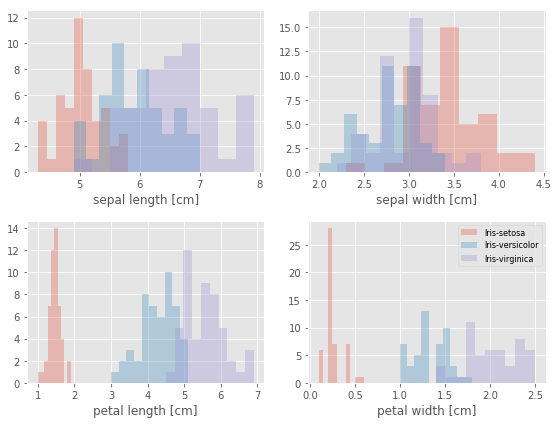

In [2]:
label_dict = {1: 'Iris-Setosa',
             2: 'Iris-Versicolor',
             3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
               1: 'sepal width [cm]',
               2: 'petal length [cm]',
               3: 'petal width [cm]'}

with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        plt.subplot(2,2,cnt+1) #positions in subplot
        for lab in tuple(set(Y)): #unique values in Y (class) convert to tuple
            plt.hist(X[Y==lab,cnt], #index X array using the label type (where there are Trues), cnt is the column number index
                    label=lab,
                    bins=10,
                    alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right',fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) #standardise dataset by setting to unit scale (mean=0 and variance =1)
# requirement for optimising performance of all ML algorithms

In [27]:
X_std

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [4]:
#the eigen vectors determine the direction of the new feature space
#the eigen values determine the magnitude of each principal component; they explain the total variance of the data along new feature axes

#calculate covariance matrix: Sigma = 1/(n-1) ((X-x,bar)^T(X-x,bar)) ; where x,bar = 1/n Sigma,i=1 to n (x_i) is a d-dimensional vector where each value equals the sample mean of a feature column
#each value of covariance matrix, sigma_j,k = 1/(n-1) Sigma, i=1 to n (x_ij - x,bar_j)(x_ik - x,bar_k) between two features

#x,bar is the sample mean of each feature column

import numpy as np

mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
#take transpose of first part then dot product and then divide by n-1, X_std.shape gives a tuple, so index first value which is nrow
print('Covariance matrix: {}'.format(cov_mat))

Covariance matrix: [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [5]:
#faster way (shortcut):
print('Covariance matrix: {}'.format(np.cov(X_std.T)))

Covariance matrix: [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
#next is to perform a eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('USING COVARIANCE MATRIX:\n eigen vectors: \n{}\n \t ###################### \n eigen values: \n{}\n'.format(eig_vecs,eig_vals))

USING COVARIANCE MATRIX:
 eigen vectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
 	 ###################### 
 eigen values: 
[ 2.93035378  0.92740362  0.14834223  0.02074601]



In [10]:
#the correlation matrix is understood as the normalised covariance matrix; so the eigendecomposition can also be done on the correlation matrix
cor_mat = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat)
print('USING CORRELATION MATRIX:\n eigen vectors: \n{}\n \t ###################### \n eigen values: \n{}\n'.format(eig_vecs,eig_vals))

USING CORRELATION MATRIX:
 eigen vectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
 	 ###################### 
 eigen values: 
[ 2.91081808  0.92122093  0.14735328  0.02060771]



In [13]:
#can also use the raw data to produce a correlation matrix (without standardising) to arrive same eigendecomposition
cor_mat2 = np.corrcoef(X.T)
eig_vals , eig_vecs = np.linalg.eig(cor_mat2)
print('USING CORRELATION MATRIX (non-standardised):\n eigen vectors: \n{}\n \t ###################### \n eigen values: \n{}\n'.format(eig_vecs,eig_vals))

USING CORRELATION MATRIX (non-standardised):
 eigen vectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
 	 ###################### 
 eigen values: 
[ 2.91081808  0.92122093  0.14735328  0.02060771]



In [16]:
#in summary, we can use 3 approaches in which to arrive to the eigendecomposition of the dataset; they all have the same eigenvectors and eigenvalues
#a 4th approach uses SVD (singular vector decomposition) which is computationally more efficient
u, s, v = np.linalg.svd(X_std.T)
print('USING SVD:\n eigen vectors: \n{}\n \t ###################### \n eigen values: \n{}\n'.format(u,s))

USING SVD:
 eigen vectors: 
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
 	 ###################### 
 eigen values: 
[ 20.89551896  11.75513248   4.7013819    1.75816839]



In [17]:
#eigenvectors form the axes and PCA reduces dimensionality of dataset by projecting it onto a smaller sub-space
#the eigenvectors all have the same unit length, 1 ; they are essentially vectors (direction). their unit length can be confirmed by:
test_array_boolean=[]
for ev in eig_vecs:
    test_array_boolean.append(np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev)))
if all(test_array_boolean):
    print('Everything works out! The actuals and desired are relatively the same!')
    
#The test verifies that the elements of actual and desired satisfy. -- abs(desired-actual) < 1.5 * 10**(-decimal)
#desired = 1.0 and actual is each value

In [20]:
all(test_array_boolean)

False